## Barplot

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

In [1]:
# Basic Library
import numpy as np
import pandas as pd

# Libraries for Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
tips.shape

(244, 7)

In [5]:
sns.set_style('darkgrid')

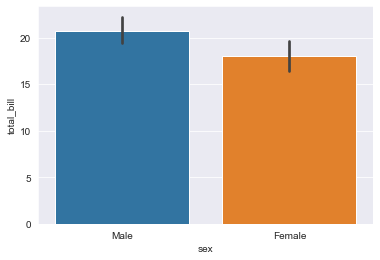

In [17]:
sns.barplot(x="sex", y="total_bill", data=tips);

In [19]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

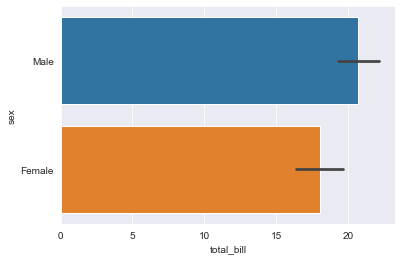

In [21]:
# Horizontal Barplot

sns.barplot(x='total_bill', y='sex', data=tips);

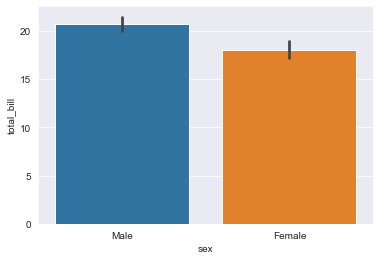

In [22]:
# Interval Estimates / Confidence Interval (ci)

sns.barplot(x='sex', y='total_bill', data=tips, ci=68);  # default: 95

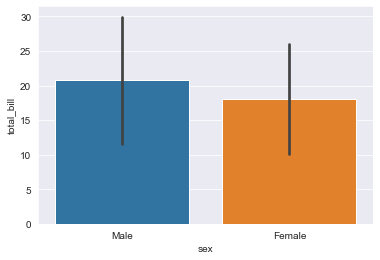

In [23]:
sns.barplot(x='sex', y='total_bill', data=tips, ci='sd');

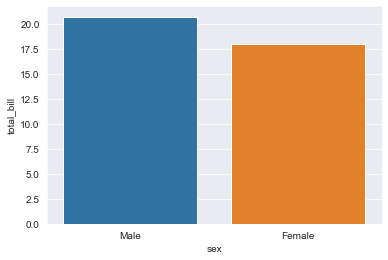

In [24]:
sns.barplot(x='sex', y='total_bill', data=tips, ci=None);

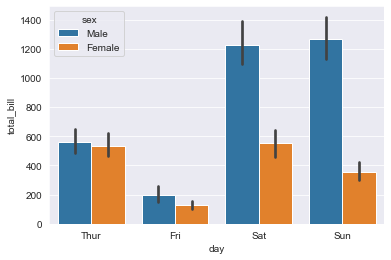

In [26]:
# Estimator : (np.mean, np.median, np.sum, np,max, np.min, np.count_nonzero)

sns.barplot(x='day', y="total_bill", data=tips, hue='sex', estimator=np.sum);

In [27]:
tips.groupby('day').total_bill.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Thur,62.0,17.682742,7.886170,7.51,12.4425,16.20,20.1550,43.11
Fri,19.0,17.151579,8.302660,5.75,12.0950,15.38,21.7500,40.17
Sat,87.0,20.441379,9.480419,3.07,13.9050,18.24,24.7400,50.81
Sun,76.0,21.410000,8.832122,7.25,14.9875,19.63,25.5975,48.17


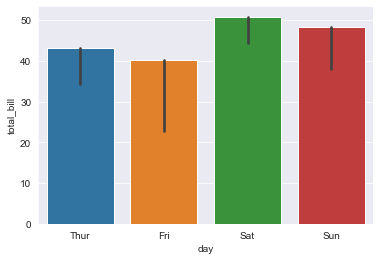

In [29]:
sns.barplot(x='day', y="total_bill", data=tips, estimator=np.max);

## Categorical Variables

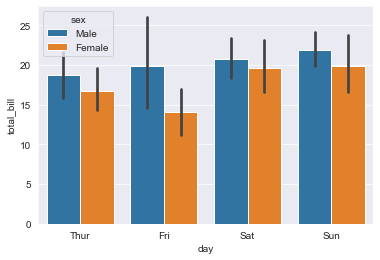

In [30]:
sns.barplot(x='day', y="total_bill", data=tips, hue='sex');

## order, hue order

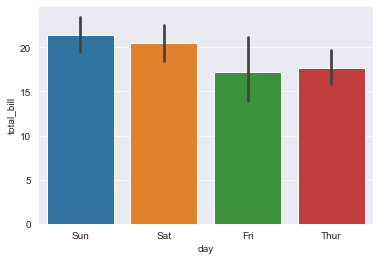

In [33]:
sns.barplot(x='day', y="total_bill", data=tips, order=['Sun', 'Sat', 'Fri', 'Thur']);

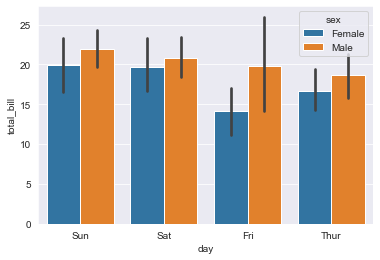

In [34]:
sns.barplot(x='day', y="total_bill", hue='sex', data=tips, 
            order=['Sun', 'Sat', 'Fri', 'Thur'], hue_order=['Female', 'Male']);

## Styling

In [35]:
sns.set_style('white')

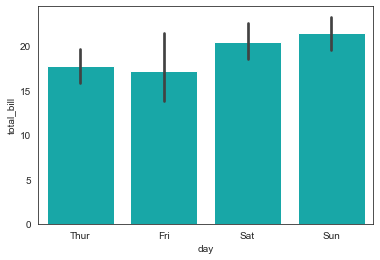

In [36]:
sns.barplot(x='day', y="total_bill", data=tips, color='c');

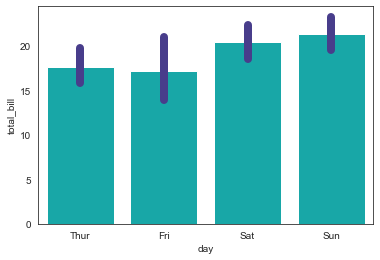

In [37]:
sns.barplot(x='day', y="total_bill", data=tips, color='c', errcolor='darkslateblue', errwidth=8);

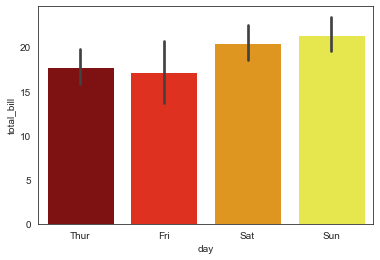

In [38]:
sns.barplot(x='day', y="total_bill", data=tips, palette='hot');

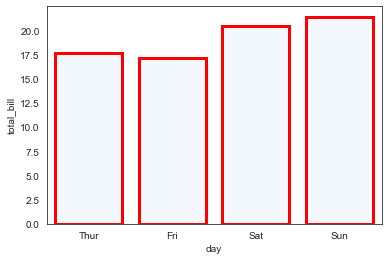

In [42]:
sns.barplot(x='day', y="total_bill", data=tips, ci=None, color='aliceblue', edgecolor='red', lw=3);

## differences between barplot and countplot

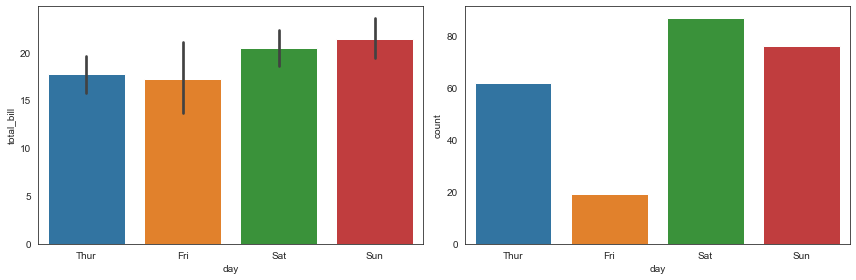

In [43]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0])
sns.countplot(x="day", data=tips, ax = ax[1])

plt.tight_layout()

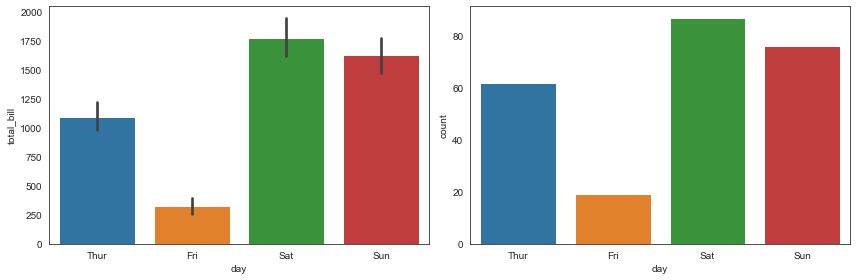

In [44]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.barplot(x="day", y="total_bill", data=tips, ax = ax[0], estimator=np.sum)
sns.countplot(x="day", data=tips, ax = ax[1])

plt.tight_layout()

## EXAMPLES

In [45]:
sns.set_style('white')

import pandas as pd

df = pd.DataFrame({'Animal': ['dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'dog'],
                   'Weight': [55, 8, 12, 25, 100, 10, 60]
                  })

In [46]:
df

,Animal,Weight
0,dog,55
1,cat,8
2,cat,12
3,dog,25
4,dog,100
5,cat,10
6,dog,60


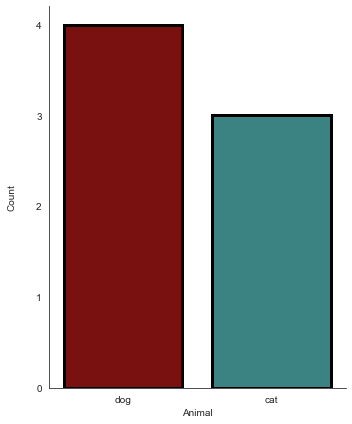

In [47]:
plt.figure(figsize=(5, 6))

sns.countplot(x='Animal', data=df, ec='black', lw=3, palette=['darkred', '#2F8F8F'])

plt.yticks([0, 1, 2, 3, 4])
plt.ylabel('Count', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats.svg');

In [48]:
df.groupby('Animal').Weight.mean()

Animal
cat    10.0
dog    60.0
Name: Weight, dtype: float64

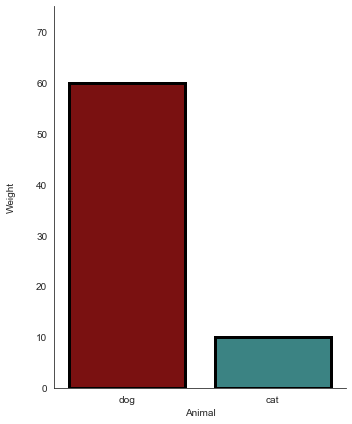

In [49]:
plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight', data=df, ec='black', lw=3, 
            palette=['darkred', '#2F8F8F'],
            ci=None
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats_bar_noCI.svg');

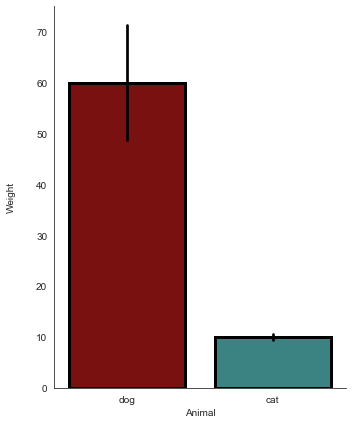

In [50]:
plt.figure(figsize=(5, 6))

sns.barplot(x='Animal', y='Weight', data=df, ec='black', lw=3, 
            palette=['darkred', '#2F8F8F'],
            ci=68, errcolor='black'
           )

plt.ylim(0, 75)
plt.ylabel('Weight', labelpad=20)

sns.despine()

plt.tight_layout()
#plt.savefig('21countplot_figure_dogsCats_bar_withCI.svg');

## Stacked Barplot

In [52]:
penguins = sns.load_dataset('penguins')
penguins_sample = penguins.dropna().groupby(['species', 'sex']).sample(3, random_state=10)

penguins_sample

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
82,Adelie,Torgersen,36.7,18.8,187.0,3800.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
58,Adelie,Biscoe,36.5,16.6,181.0,2850.0,Female
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,Male
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,Male
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female
182,Chinstrap,Dream,40.9,16.6,187.0,3200.0,Female
193,Chinstrap,Dream,46.2,17.5,187.0,3650.0,Female
171,Chinstrap,Dream,49.2,18.2,195.0,4400.0,Male


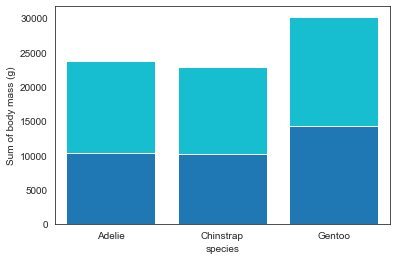

In [53]:
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Female'],
            color='tab:blue',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci=None,
            estimator=np.sum,
            saturation=1
           )
sns.barplot(x='species', y='body_mass_g',
            data=penguins_sample[penguins_sample.sex == 'Male'],
            color='tab:cyan',
            order = ['Adelie', 'Chinstrap', 'Gentoo'],
            ci = None,
            estimator = np.sum,
            bottom=(
                penguins_sample[penguins_sample.sex == 'Female']
                .groupby('species')
                .body_mass_g
                .sum()),
            saturation=1
           )

plt.ylabel('Sum of body mass (g)');

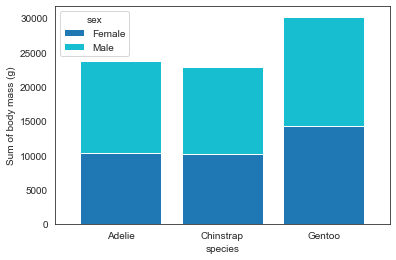

In [54]:
(penguins_sample
    .groupby(['species', 'sex'])
    .body_mass_g
    .sum()
    .unstack()
).plot(kind='bar', stacked=True, color=['tab:blue', 'tab:cyan'], width=0.8)

plt.xticks(rotation=0)
plt.ylabel('Sum of body mass (g)');